## Data Collection & Preparation

* ``Pandas`` for managing the data
* ``NumPy`` for math operations
* ``Sklearn`` for Machine Learning
* ``Seaborn`` for advanced visualization
* ``Matplotlib`` for additional plotting

In [3]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [4]:
#read data files

cs = pd.read_csv("charging_sessions.csv")
wba = pd.read_csv("weather_burbank_airport.csv")

In [365]:
#print the first 5 rows of the charging_sessions dataset
cs.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [366]:
#print out the first 5 rows of the weather burbank airport dataset
wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [367]:
#print out the columns of charging sessions dataset
cs.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')

In [368]:
#print out the columns of weather burbank airport dataset
wba.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')

In [369]:
#print out the tail of cs dataset to see how many entries there are
cs.tail()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
66449,10087,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [370]:
#print out the tail of cs dataset to see how many entries there are
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


### We will focus on the charging_sessions dataset for a while

In [371]:
#print information about cs dataset
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


We can see that this dataset has an unnamed column that represents the entry number. For better readability, we will rename this column.

In [372]:
#rename the unnamed column
cs.rename( columns={'Unnamed: 0':'number'}, inplace=True )

In [373]:
#check if the column was renamed
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


## Working with missing values

<p>We are going to follow some steps to work with the missing data. First we will Identify the missing data and then deal with it in order to start working with the dataset.

**Detecting missing numerical data**

From looking at the count of every column, we can see that the "doneChargingTime" has missing values. The missing values in the "userID" and "userInputs" columns are because the user was not registered, so we can ignore them for now.
</p>


In [5]:
#We use the next function to identify missing values:
missing_data = cs.isnull()
missing_data

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,False,False,False,False,False,False,False,False,False,False,False,False,False
66446,False,False,False,False,False,False,False,False,False,False,False,False,False
66447,False,False,False,False,False,False,False,False,False,False,False,False,False
66448,False,False,False,False,False,False,False,False,False,False,False,False,False


<p>The output we receive is a boolean value that indicates whether the value is in fact missing data.

We use next another function which will quicky give us the number of missing values in each column.
"True" represents a missing value and "False" represents that there exist a value in the cell.</p>

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
Unnamed: 0
False    66450
Name: count, dtype: int64

id
id
False    66450
Name: count, dtype: int64

connectionTime
connectionTime
False    66450
Name: count, dtype: int64

disconnectTime
disconnectTime
False    66450
Name: count, dtype: int64

doneChargingTime
doneChargingTime
False    62362
True      4088
Name: count, dtype: int64

kWhDelivered
kWhDelivered
False    66450
Name: count, dtype: int64

sessionID
sessionID
False    66450
Name: count, dtype: int64

siteID
siteID
False    66450
Name: count, dtype: int64

spaceID
spaceID
False    66450
Name: count, dtype: int64

stationID
stationID
False    66450
Name: count, dtype: int64

timezone
timezone
False    66450
Name: count, dtype: int64

userID
userID
False    49187
True     17263
Name: count, dtype: int64

userInputs
userInputs
False    49187
True     17263
Name: count, dtype: int64



We can notice that the columns with missing values are: 

- "doneChargingTime": 4088 missing data 
- "userID": 17263 missing data 
- "userInputs": 17263 missing data 

In [7]:
#drop all rows containing null values
cs.dropna(axis=0, inplace=False)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66444,10082,5d574ad2f9af8b4c10c03651,2019-07-31 14:50:17+00:00,2019-08-01 01:01:18+00:00,2019-07-31 20:29:24+00:00,27.174,1_1_191_784_2019-07-31 14:50:17.037367,1,AG-4F40,1-1-191-784,America/Los_Angeles,448.0,"[{'WhPerMile': 200, 'kWhRequested': 28.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."


In [8]:
#check how many rows are getting dropped
len(cs)-len(cs.dropna())

20442

This number is higher than expected, as it includes null values from userID and userInputs (unregistered users or users with no input). We want now to isolate missing values specifically from the 'doneChargingTime' column.

In [9]:
#We can filter the data accordingly:

len(cs)-len(cs.dropna(subset = ['doneChargingTime']))

4088

This number tells us that there are 4088 sessions with no timestamp for when the EV got done charging, meaning that it didn't fully charge. Let's look at this data.

In [10]:
#display records with 'doneCharging = Null
cs_notdone = cs[cs['doneChargingTime'].isnull()]
cs_notdone

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaN,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0,"[{'WhPerMile': 250, 'kWhRequested': 75.0, 'mil..."
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaN,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaN,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaN,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
3760,3760,5ea4d60df9af8b46573f1eea,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaN,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0,"[{'WhPerMile': 300, 'kWhRequested': 6.0, 'mile..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60411,4049,5cb3d2a8f9af8b4551261e75,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaN,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
61097,4735,5cc8e891f9af8b45d975b819,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaN,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,America/Los_Angeles,364.0,"[{'WhPerMile': 400, 'kWhRequested': 56.0, 'mil..."
61103,4741,5cca3a54f9af8b49aaa4cbac,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaN,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
61117,4755,5cca3a54f9af8b49aaa4cbba,2019-04-15 13:52:45+00:00,2019-04-15 14:47:01+00:00,NaN,4.558,1_1_179_800_2019-04-15 13:52:44.693153,1,AG-3F32,1-1-179-800,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 12.0, 'mil..."


### Dealing with missing values

<p>When dealing with missing values, we can either **exclude** them from the dataset or **impute** the null values with estimates. However, it's challenging to impute timestamps since they represent the completion of charging, which did not occur in these cases. Estimating a value for these timestamps doesn't make sense because the EV never finished charging.

Additionally, our goal is to optimize utilization, and including data points where the EV never fully charged (and thus remained plugged in without charging, potentially hindering other EVs) is not appropriate. Therefore, we will exclude these data points.</p>

In [11]:
#we take every row where "doneChargingTime" is not null into our new dataset cs_clean
cs_clean = cs[cs['doneChargingTime'].notna()]

In [381]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


In [12]:
#We can check now that the row "doneChargingTime" has not missing data:

missing_data2 = cs_clean.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print(missing_data2[column].value_counts())
    print("")

Unnamed: 0
Unnamed: 0
False    62362
Name: count, dtype: int64

id
id
False    62362
Name: count, dtype: int64

connectionTime
connectionTime
False    62362
Name: count, dtype: int64

disconnectTime
disconnectTime
False    62362
Name: count, dtype: int64

doneChargingTime
doneChargingTime
False    62362
Name: count, dtype: int64

kWhDelivered
kWhDelivered
False    62362
Name: count, dtype: int64

sessionID
sessionID
False    62362
Name: count, dtype: int64

siteID
siteID
False    62362
Name: count, dtype: int64

spaceID
spaceID
False    62362
Name: count, dtype: int64

stationID
stationID
False    62362
Name: count, dtype: int64

timezone
timezone
False    62362
Name: count, dtype: int64

userID
userID
False    46008
True     16354
Name: count, dtype: int64

userInputs
userInputs
False    46008
True     16354
Name: count, dtype: int64



In [13]:
# Here we check specifically for missing values in the 'doneChargingTime' column:
missing_values = cs_clean['doneChargingTime'].isnull()
print(missing_values.sum())

0


The data is now clean and we can work with it!

## Descriptive Analysis

In [14]:
#testing grounds for descriptive analysis
cs_test = cs_clean

In [385]:
cs_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


In [386]:
# Regarding 2(c):
# To understand which of the two sites is public and which is private, 
# we start by first selecting all rows by their siteID, starting with siteID==1

cs_test.loc[cs_test['siteID']==1,:]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [387]:
# Now we select all rows with siteID==2

cs_test.loc[cs_test['siteID']==2,:]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
20179,0,5c412c1df9af8b12cb56c27c,2019-01-01 17:41:45+00:00,2019-01-01 18:39:21+00:00,2019-01-01 18:40:21+00:00,0.900,2_39_138_566_2019-01-01 17:41:44.784919,2,CA-512,2-39-138-566,America/Los_Angeles,NaN,NaN
20180,1,5c412c1df9af8b12cb56c27d,2019-01-01 18:09:17+00:00,2019-01-02 02:39:32+00:00,2019-01-01 20:16:10+00:00,12.534,2_39_79_379_2019-01-01 18:09:16.991864,2,CA-327,2-39-79-379,America/Los_Angeles,558.0,"[{'WhPerMile': 222, 'kWhRequested': 17.76, 'mi..."
20181,2,5c412c1df9af8b12cb56c27e,2019-01-01 18:39:25+00:00,2019-01-01 19:18:49+00:00,2019-01-01 19:19:47+00:00,0.883,2_39_138_566_2019-01-01 18:39:24.566872,2,CA-512,2-39-138-566,America/Los_Angeles,NaN,NaN
20182,3,5c412c1df9af8b12cb56c27f,2019-01-01 19:18:53+00:00,2019-01-01 20:14:07+00:00,2019-01-01 19:59:08+00:00,0.879,2_39_138_566_2019-01-01 19:18:52.843645,2,CA-512,2-39-138-566,America/Los_Angeles,NaN,NaN
20183,4,5c412c1df9af8b12cb56c280,2019-01-01 21:05:57+00:00,2019-01-02 02:03:02+00:00,2019-01-02 01:59:27+00:00,16.136,2_39_79_378_2019-01-01 21:05:56.972890,2,CA-326,2-39-79-378,America/Los_Angeles,1135.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,2448,5fff9e9cf9af8b4c2a7970d7,2020-12-29 00:22:25+00:00,2020-12-29 01:32:10+00:00,2020-12-29 01:07:43+00:00,2.092,2_39_125_21_2020-12-29 00:22:24.970035,2,CA-311,2-39-125-21,America/Los_Angeles,1746.0,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
51574,2455,6000f01bf9af8b4e29871065,2020-12-29 22:21:20+00:00,2020-12-30 02:37:08+00:00,2020-12-29 23:30:29+00:00,2.324,2_39_78_365_2020-12-29 22:21:20.198961,2,CA-321,2-39-78-365,America/Los_Angeles,1082.0,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."
51581,2462,6002419cf9af8b50514f4c3d,2020-12-30 19:32:38+00:00,2020-12-30 20:34:51+00:00,2020-12-30 20:34:46+00:00,3.068,2_39_125_21_2020-12-30 19:32:38.465177,2,CA-311,2-39-125-21,America/Los_Angeles,1746.0,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
51583,2464,6002419cf9af8b50514f4c3f,2020-12-30 23:02:11+00:00,2020-12-31 02:53:06+00:00,2020-12-31 00:08:50+00:00,2.244,2_39_78_365_2020-12-30 23:02:11.119521,2,CA-321,2-39-78-365,America/Los_Angeles,1082.0,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."


In [388]:
cs_test["siteID"].value_counts()

siteID
1    33004
2    29358
Name: count, dtype: int64

We can see that there are 33004 data entries for the first site and 29358 entries for the second site.
Next up, we can temporarily split the data set in two parts to ease our upcoming work.


In [15]:
#To do this, we first define two indices to help us drop the rows by the value of siteID.
index_site1 = cs_test[cs_test['siteID']==1].index
index_site2 = cs_test[cs_test['siteID']==2].index

Now that we have our indices defined, we can drop the rows to split our data set. 
Note that we use the correct indices so that we drop all rows where siteID==2 for our first set.

In [16]:
cs_test_s1 = cs_test.drop(index_site2)
cs_test_s2 = cs_test.drop(index_site1)


We can now verify that the previous step worked as intended. Note the number of data entries for each set.


In [391]:
cs_test_s1.shape

(33004, 13)

In [392]:
cs_test_s2.shape

(29358, 13)

<p>We can determine key differences between the two data sets that will help us understand
which of the two sites is privately owned and which one is public.

Let's start off by looking at how many registered users we have in each data set. </p>

In [17]:
# We do this by checking the sum of null values for the first set.
cs_test_s1.isnull().sum()

Unnamed: 0             0
id                     0
connectionTime         0
disconnectTime         0
doneChargingTime       0
kWhDelivered           0
sessionID              0
siteID                 0
spaceID                0
stationID              0
timezone               0
userID              1481
userInputs          1481
dtype: int64

We can now verify that the previous step worked as intended. Note the number of data entries for each set.

<p>We can see that there are 1481 unregistered users in our first data set, which contains a total of 33004 entries.

Therefore, the share of registered users in set 1 is roughly 95,5%. </p>

In [394]:
(33004-1481)/33004

0.9551266513149921

Now, let's do the same for our second set.

In [18]:
# We check the sum of null values for the second set.
cs_test_s2.isnull().sum()

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime        0
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              14873
userInputs          14873
dtype: int64

In [396]:
#Formula for the percentage of unregistered users:

(29358-14873)/29358

0.493391920430547

<p>In our second data set (with a total of 29358 entries) there are 14,873 entries with missing userIDs, resulting in a registered user share of approximately 49.3%.

We can obvserve a significant difference in registered user representation between the two datasets (Site 1: 95,5%, Site 2: 49,3%) and thus, for the two charging sites.

Our domain knowledge suggests that privately owned charging sites, often used by employees, tend to attract regular users with registered accounts. Additionally, we have reason to assume that customers with access to a private charging site would likely have a registered account, as they frequent the site and thus could make use of the benefits that come with registering an account. 

In contrast, public charging stations serve to a broader range of users, including those who charge infrequently. Considering the stark contrast in registered user shares between the two sites, we can confidently conclude that Site 1 is privately owned and Site 2 is public.</p>

In [397]:
# Note for our assignment:
# Additional metrics would definitely be of benefit, 
# but I think this one alone is pretty much all we need as the minimum 

**Dummy Variable**

We will change the column "siteID" to a dummy variable in order to use it as an indicator variable, so we can use it for regression analysis in the later analysis.

In [19]:
cs_test.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')

In [20]:
# We will use pandas' method 'get_dummies':
cs_test1 = cs_test

dummy_var1 = pd.get_dummies(cs_test1["siteID"])
dummy_var1.head()

,1,2
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


Next we convert the "siteID" variable of the dataset into 2 indicator variables, "private-site" and "public-site". Then drop the "siteID" variable from the dataset.

In [21]:
dummy_var1.rename(columns={1:'private-site', 2:'public-site'}, inplace=True)
dummy_var1.head()

,private-site,public-site
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [22]:
# merge data frame "cs_test2" and "dummy_var1" 
cs_test1 = pd.concat([cs_test1, dummy_var1], axis=1)

# drop original column "siteID" from "cs_test2"
cs_test1.drop("siteID", axis = 1, inplace=True)

In [402]:
cs_test1.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False


Dealing with the datatime columns

In [23]:
#tests for 2(a) - temporal and seasonal differences

# Since the time values for all datatime objects are in UTC (GMT), we first have to correct the values. 
# The timezone for Los Angeles is GMT-8, so we have to adjust all time values for every data entry by 8 hours.

from datetime import datetime, timedelta

# As an example on how this can be done, let's take the current datetime (which is GMT+1 for us in Germany) and
# subtract 9 hours using timedelta. This will give us the current datetime for LA.

current_time_LA = datetime.now() - timedelta(hours=9)
current_time_LA

datetime.datetime(2024, 1, 27, 2, 36, 49, 295070)

In [24]:
cs_test2 = cs_test1
cs_test2["connectionTime"].info()

<class 'pandas.core.series.Series'>
Index: 62362 entries, 0 to 66449
Series name: connectionTime
Non-Null Count  Dtype 
--------------  ----- 
62362 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [25]:
# Here we apply the datetime.strptime() function for a single data entry:

cs_test2.loc[0, 'connectionTime'] = datetime.strptime(cs_test2.loc[0, 'connectionTime'], "%Y-%m-%d %H:%M:%S+00:00")

cs_test2.loc[0, 'connectionTime']

datetime.datetime(2020, 1, 2, 13, 8, 54)

In [406]:
# For testing purposes, let's try to apply this adjustment for a single data entry first, the row number 0.
# Upon running the code, we can notice that the time data is still stored as a String object. 
# We can use the datetime.strptime() method to convert String objects to datetime objects.

cs_test2.loc[0, 'connectionTime'] = cs_test2.loc[0, 'connectionTime'] - timedelta(hours=8)

In [34]:
cs_test2["connectionTime"].head(15)

0     2020-01-02 13:08:54
1     2020-01-02 05:36:50
2     2020-01-02 05:56:35
3     2020-01-02 05:59:58
4     2020-01-02 06:00:01
5     2020-01-02 06:00:13
6     2020-01-02 06:09:14
7     2020-01-02 06:17:32
8     2020-01-02 06:25:38
9     2020-01-02 06:27:40
10    2020-01-02 06:30:45
11    2020-01-02 07:04:38
12    2020-01-02 07:04:38
13    2020-01-02 07:15:27
14    2020-01-02 07:19:05
Name: connectionTime, dtype: object

In [408]:
# We have successfully transformed this single data entry from String object to datatime object.
# Now we can do the same for all data entries in our cs_test2 dataframe

In [27]:
#In order to do not commit any error, lets first reset the chage we made to the first row:

cs_test2.loc[0, 'connectionTime'] = cs_test2.loc[0, 'connectionTime'] + timedelta(hours=8)
cs_test2.loc[0, 'connectionTime'] = cs_test2.loc[0, 'connectionTime'].strftime('%Y-%m-%d %H:%M:%S+00:00')


In [28]:
#We now transform all the rows and change all datatime objects (which are in UTC) to the timezone for Los Angeles (GMT-8).

#Lets do it also for the other two data columns "disconnectTime" and "doneChargingTime":

for i in range(len(cs_test2)):
    
    try:
        connectionTime_str = cs_test2.loc[i, 'connectionTime']
        connectionTime_dt = datetime.strptime(connectionTime_str, '%Y-%m-%d %H:%M:%S+00:00')
        cs_test2.loc[i, 'connectionTime'] = connectionTime_dt - timedelta(hours=8)

        disconnectTime_str = cs_test2.loc[i, 'disconnectTime']
        disconnectTime_dt = datetime.strptime(disconnectTime_str, '%Y-%m-%d %H:%M:%S+00:00')
        cs_test2.loc[i, 'disconnectTime'] = disconnectTime_dt - timedelta(hours=8)

        doneChargingTime_str = cs_test2.loc[i, 'doneChargingTime']
        doneChargingTime_str = datetime.strptime(doneChargingTime_str, '%Y-%m-%d %H:%M:%S+00:00')
        cs_test2.loc[i, 'doneChargingTime'] = doneChargingTime_str - timedelta(hours=8)
    except KeyError:
        # Handle the case where the index is not found
        pass



In [35]:
#Now we can see the result:

cs_test2.loc[:, ["connectionTime", "disconnectTime","doneChargingTime"]].head(5)


,connectionTime,disconnectTime,doneChargingTime
0,2020-01-02 13:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35
1,2020-01-02 05:36:50,2020-01-02 14:38:21,2020-01-02 12:18:05
2,2020-01-02 05:56:35,2020-01-02 16:39:22,2020-01-02 08:35:06
3,2020-01-02 05:59:58,2020-01-02 08:38:39,2020-01-02 07:18:45
4,2020-01-02 06:00:01,2020-01-02 14:08:40,2020-01-02 10:17:30


In [42]:
cs_test2.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,UOT
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,0 days 02:20:16
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 08:04:16
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 01:19:54
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,0 days 03:51:10


Analyzing the kW/h Delivered

In [33]:
cs_test2["kWhDelivered"]

0        25.016
1        33.097
2         6.521
3         2.355
4        13.375
          ...  
66445    28.787
66446     7.787
66447    11.274
66448    11.589
66449     0.897
Name: kWhDelivered, Length: 62362, dtype: float64

Text(0.5, 1.0, 'KW/h Delivered')

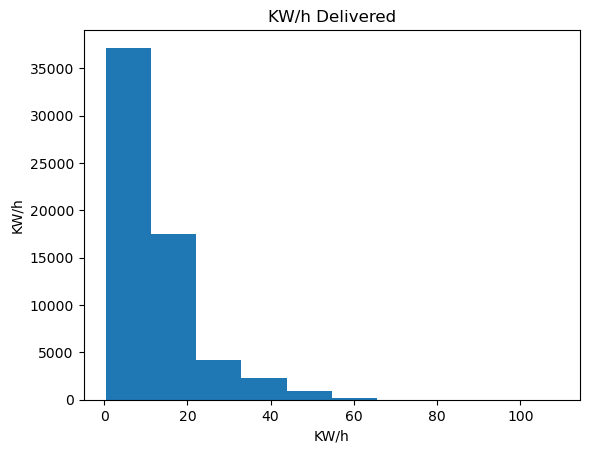

In [43]:
#Lets analyze the column "KWhDelivered":

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cs_test2["kWhDelivered"])

plt.pyplot.xlabel("KW/h")
plt.pyplot.ylabel("KW/h")
plt.pyplot.title("KW/h Delivered")

In [44]:
bins = np.linspace(min(cs_test2["kWhDelivered"]), max(cs_test2["kWhDelivered"]), 4)
bins

array([  0.501     ,  36.59974722,  72.69849444, 108.79724167])

In [45]:
group_names = ["Low", "Mid", "Hi"]

In [46]:
cs_test2['kWhDelivered-binned'] = pd.cut(cs_test2["kWhDelivered"], bins, labels=group_names, include_lowest=True )
cs_test2[['kWhDelivered','kWhDelivered-binned']].head(20)

,kWhDelivered,kWhDelivered-binned
0,25.016,Low
1,33.097,Low
2,6.521,Low
3,2.355,Low
4,13.375,Low
5,13.370,Low
6,43.477,Mid
7,32.441,Low
8,13.264,Low
9,13.285,Low


In [47]:
cs_test2["kWhDelivered-binned"].value_counts()

kWhDelivered-binned
Low    59773
Mid     2586
Hi         3
Name: count, dtype: int64

Text(0.5, 1.0, 'KW/h Delivered')

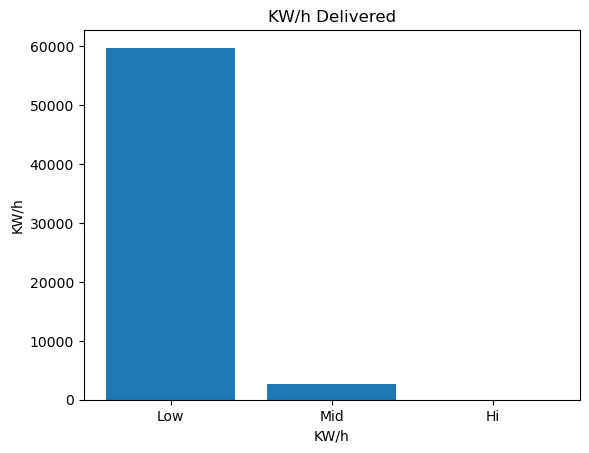

In [48]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, cs_test2["kWhDelivered-binned"].value_counts())

plt.pyplot.xlabel("KW/h")
plt.pyplot.ylabel("KW/h")
plt.pyplot.title("KW/h Delivered")

Normatization of the column "kWhDelivered".
Here we are going to transform the values of this column so the variable values range from 0 to 1.

In [49]:
# replace (original value) by (original value)/(maximum value)
cs_test2['kWhDelivered-pct'] = cs_test2['kWhDelivered']/cs_test2['kWhDelivered'].max()

# Here we can see we've normalized "kWhDelivered"in the range of 0 to 1.


In [50]:
cs_test2.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,0 days 02:20:16,Low,0.304208
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 08:04:16,Low,0.059937
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 01:19:54,Low,0.021646
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,0 days 03:51:10,Low,0.122935


In [51]:
#
cs_test3 = cs_test2

In [52]:
cs_test3["connectionTime"] = pd.to_datetime(cs_test3["connectionTime"])
cs_test3["disconnectTime"] = pd.to_datetime(cs_test3["disconnectTime"])
cs_test3["doneChargingTime"] = pd.to_datetime(cs_test3["doneChargingTime"])

In [53]:
cs_test3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Unnamed: 0           62362 non-null  int64              
 1   id                   62362 non-null  object             
 2   connectionTime       62362 non-null  datetime64[ns, UTC]
 3   disconnectTime       62362 non-null  datetime64[ns, UTC]
 4   doneChargingTime     62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered         62362 non-null  float64            
 6   sessionID            62362 non-null  object             
 7   spaceID              62362 non-null  object             
 8   stationID            62362 non-null  object             
 9   timezone             62362 non-null  object             
 10  userID               46008 non-null  float64            
 11  userInputs           46008 non-null  object             
 12  private-site         62

In [54]:
cs_test3.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,0 days 02:20:16,Low,0.304208
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 08:04:16,Low,0.059937
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 01:19:54,Low,0.021646
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,0 days 03:51:10,Low,0.122935


In [55]:
# Extract the hour from the connectionTime column
cs_test3["connectionTime-hour"] = cs_test3["connectionTime"].dt.hour
cs_test3["doneChargingTime-hour"] = cs_test3["doneChargingTime"].dt.hour


In [56]:
# Group the data by hour and calculate the average kWh delivered
avg_kWh_per_hour = cs_test3.groupby("connectionTime-hour")["kWhDelivered"].mean()

print("Average kWh delivered per hour:")
print(avg_kWh_per_hour)


Average kWh delivered per hour:
connectionTime-hour
0     10.572253
1     12.582392
2      9.863258
3     14.341865
4     14.133523
5     13.992549
6     15.050403
7     12.968685
8     10.088586
9      9.767007
10    10.203472
11    10.179577
12     9.894781
13    10.700571
14    12.150141
15     8.534671
16     8.682071
17     8.891992
18     9.880828
19    10.410880
20    10.545941
21    10.940299
22    12.020410
23     9.702898
Name: kWhDelivered, dtype: float64


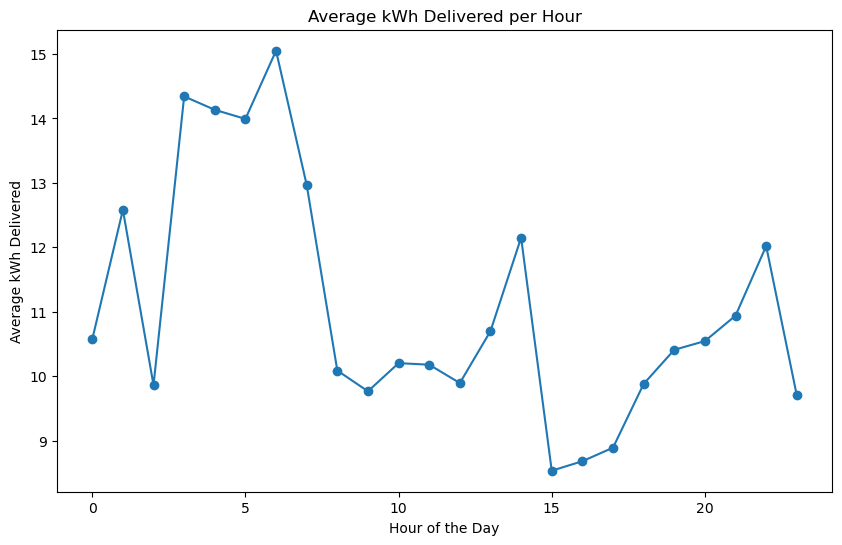

In [57]:
# Create a line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(avg_kWh_per_hour.index, avg_kWh_per_hour.values, marker='o')
plt.title("Average kWh Delivered per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average kWh Delivered")
plt.show()


The graph shows that the average kWh delivered per hour increases throughout the morning, reaching a peak of 14.5 kWh at around 03:00; another higher at 07:00; and two other more with lower kWh delivered. We can notice that the average kWh delivered then decreases gradually throughout the afternoon and evening, reaching a low of 9.5 kWh at around 23:00.

In [58]:
# Extract the day of the week from the connectionTime column
cs_test3["dayOfWeek"] = cs_test3["connectionTime"].dt.day_name()

# Calculate the average amount of kWh delivered for each day of the week
avg_kWh_per_day = cs_test3.groupby("dayOfWeek")["kWhDelivered"].mean()

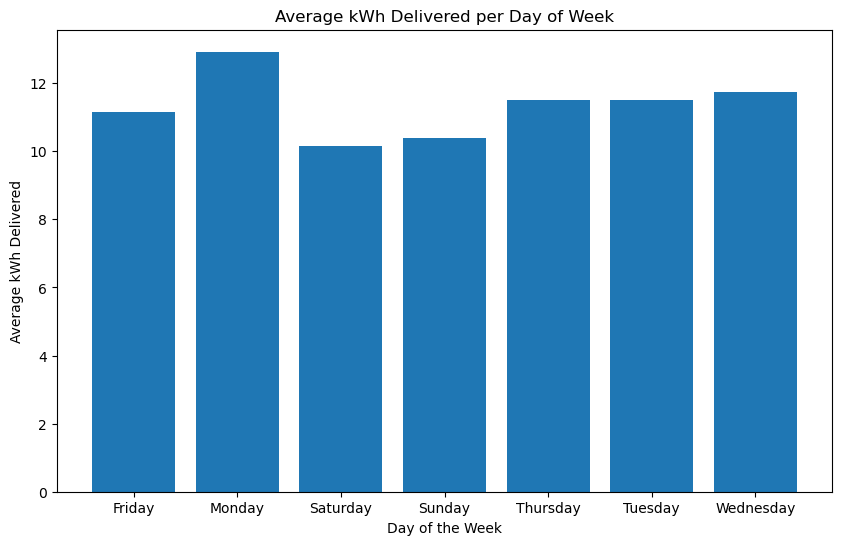

In [59]:
# Visualize the average amount of kWh delivered as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_kWh_per_day.index, avg_kWh_per_day.values)
plt.title("Average kWh Delivered per Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average kWh Delivered")
plt.show()


The overall trend in the graph shows that the average kWh delivered per day is higher during the workweek when businesses and households are using more electricity. The average kWh delivered is lower on the weekends when businesses and households are using less electricity.

In [60]:
# Filter the data to only include private-site
df_filtered_private_site = cs_test3[cs_test3['private-site'] == True].index
df_filtered_public_site = cs_test3[cs_test3['private-site'] == False].index


private = cs_test3.drop(df_filtered_public_site)
public = cs_test3.drop(df_filtered_private_site)

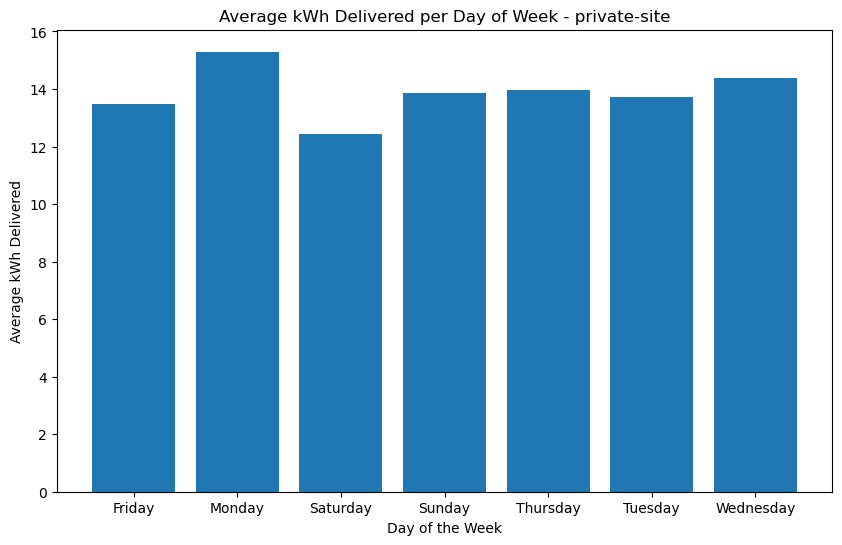

In [61]:
# Extract the day of the week from the connectionTime column
private["dayOfWeek"] = private["connectionTime"].dt.day_name()

# Calculate the average amount of kWh delivered for each day of the week
avg_kWh_per_day = private.groupby("dayOfWeek")["kWhDelivered"].mean()

# Visualize the average amount of kWh delivered as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_kWh_per_day.index, avg_kWh_per_day.values)
plt.title("Average kWh Delivered per Day of Week - private-site")
plt.xlabel("Day of the Week")
plt.ylabel("Average kWh Delivered")
plt.show()


The overall trend in the graph is similar to the previous graph of the average kWh delivered per day of the week.

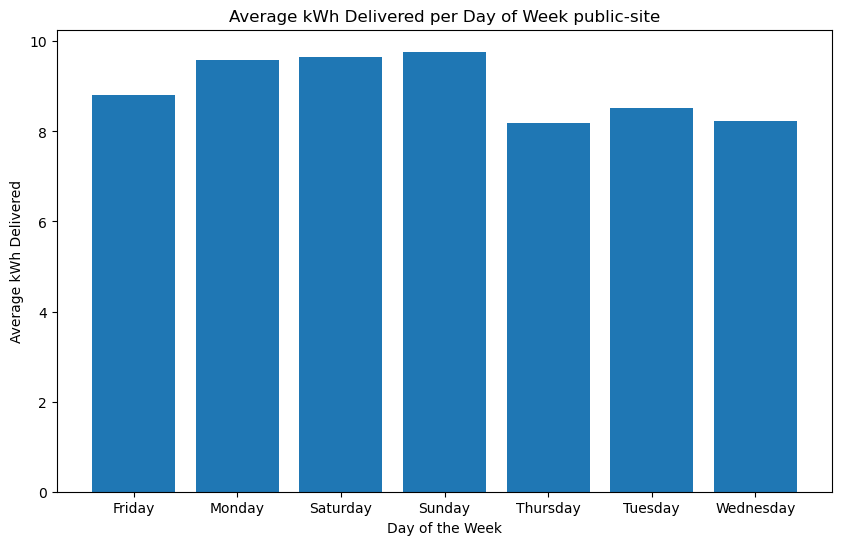

In [62]:
# Extract the day of the week from the connectionTime column
public["dayOfWeek"] = public["connectionTime"].dt.day_name()

# Calculate the average amount of kWh delivered for each day of the week
avg_kWh_per_day = public.groupby("dayOfWeek")["kWhDelivered"].mean()

# Visualize the average amount of kWh delivered as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_kWh_per_day.index, avg_kWh_per_day.values)
plt.title("Average kWh Delivered per Day of Week public-site")
plt.xlabel("Day of the Week")
plt.ylabel("Average kWh Delivered")
plt.show()

The overall trend in this graph is slightly different because the average kWh delivered is higher in the weekend than in the workdays.

**Regarding 2(b):**

We can determine a few Key Performance Indicators to provide an overview of the charging site operations,
utilization and efficiency. 

**KPI 1: Unutilized Occupation Time**

One choice for a KPI are the opportunity costs that arise when EVSE is occupied by an already fully charged EV. 
We can call this KPI "unutilized occupation time". We can calculate the UOT by calculating the time difference
between our variables "doneChargingTime" and "disconnectTime".

In [63]:
# Let's demonstrate the UOT calculcation with a single data entry first:

cs_test4 = cs_test3
cs_test4.loc[0,"disconnectTime"] - cs_test4.loc[0,"doneChargingTime"]

Timedelta('0 days 01:39:40')

In [64]:
# Now, let's add a column to our cs_test4 dataframe that will contain our UOT for each data entry:

cs_test4["UOT"] = cs_test4["disconnectTime"] - cs_test4["doneChargingTime"]
cs_test4.head(20)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932,13,9,Thursday
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,0 days 02:20:16,Low,0.304208,5,12,Thursday
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 08:04:16,Low,0.059937,5,8,Thursday
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 01:19:54,Low,0.021646,5,7,Thursday
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,0 days 03:51:10,Low,0.122935,6,10,Thursday
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13+00:00,2020-01-02 15:00:41+00:00,2020-01-02 12:13:21+00:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,AG-1F13,1-1-194-821,America/Los_Angeles,3519.0,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil...",True,False,0 days 02:47:20,Low,0.122889,6,12,Thursday
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14+00:00,2020-01-02 17:57:58+00:00,2020-01-02 16:59:21+00:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,AG-1F09,1-1-178-817,America/Los_Angeles,933.0,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi...",True,False,0 days 00:58:37,Mid,0.399615,6,16,Thursday
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32+00:00,2020-01-02 16:44:54+00:00,2020-01-02 12:22:40+00:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,AG-4F34,1-1-191-804,America/Los_Angeles,3737.0,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil...",True,False,0 days 04:22:14,Low,0.298179,6,12,Thursday
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38+00:00,2020-01-02 11:36:05+00:00,2020-01-02 10:38:39+00:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,AG-1F11,1-1-194-826,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",True,False,0 days 00:57:26,Low,0.121915,6,10,Thursday
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 06:27:40+00:00,2020-01-02 12:01:48+00:00,2020-01-02 11:17:46+00:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,AG-1F08,1-1-178-823,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil...",True,False,0 days 00:44:02,Low,0.122108,6,11,Thursday


In [65]:
# We can now calculate the average UOT and group them hourly by the time an EV is done charging.

# Group the data by hour and calculate the average UOT
avg_UOT_per_hour = cs_test4.groupby("doneChargingTime-hour")["UOT"].mean()

print("Average UOT per hour (grouped by doneChargingTime):")
print(avg_UOT_per_hour)


Average UOT per hour (grouped by doneChargingTime):
doneChargingTime-hour
0    0 days 02:25:33.691680261
1       0 days 02:59:17.025000
2    0 days 02:44:00.358078602
3    0 days 04:14:35.537974683
4    0 days 01:53:32.026737967
5    0 days 02:55:48.597014925
6    0 days 03:56:57.467901234
7    0 days 05:16:36.444168734
8    0 days 05:12:53.537359550
9    0 days 04:56:56.629876132
10   0 days 04:08:14.064531548
11   0 days 03:28:44.660748146
12   0 days 02:57:41.534925732
13   0 days 02:22:33.072702943
14   0 days 01:44:20.669162995
15   0 days 01:18:40.178753830
16   0 days 01:06:52.950932684
17   0 days 01:16:48.855390904
18   0 days 01:20:38.667316692
19   0 days 01:37:58.192543411
20   0 days 01:55:39.826315789
21   0 days 02:40:45.069212410
22   0 days 02:49:57.695550351
23   0 days 02:33:30.982062780
Name: UOT, dtype: timedelta64[ns]


**How can we draw conclusions from this KPI?**

We can observe a higher UOT during nighttime, which is to be expected. Reducing the UOT is of general benefit, since the occupied station is not being utilized. Now, reducing the UOT during nighttime is unrealistic without artifically reducing the charging rate - whether this would actually lead to monetary benefits is unclear. However, if we can reduce the UOT during daytime, it may lead to an increase in efficiency of the charging site. One way to do this would be to find some sort of incentive for users to disconnect their EV from the station as soon as possible once it is done charging. Finding an exact method for this should not be part of this assignment, though. The UOT KPI will help with measuring and evaluating the effectiveness of such methods.

**KPI 2: EVSE Downtime**

As another KPI, we can look at unutilized EVSE, meaning stations that are not connected to any EV. We can calculate the average time the EVSE goes unutilized. We can call this KPI "EVSE downtime".

In [66]:
# First, let's check check how many EVSE stations there are. To do this, we use the pandas unique function:

cs_test5 = cs_test2
len(cs_test5.stationID.unique())

106

In [67]:
cs_test5.stationID.unique()

array(['1-1-179-810', '1-1-193-825', '1-1-193-829', '1-1-193-820',
       '1-1-193-819', '1-1-194-821', '1-1-178-817', '1-1-191-804',
       '1-1-194-826', '1-1-178-823', '1-1-179-788', '1-1-194-818',
       '1-1-178-824', '1-1-194-822', '1-1-179-783', '1-1-193-816',
       '1-1-179-798', '1-1-178-828', '1-1-179-787', '1-1-191-792',
       '1-1-193-827', '1-1-179-777', '1-1-179-799', '1-1-179-796',
       '1-1-179-815', '1-1-179-797', '1-1-179-781', '1-1-179-800',
       '1-1-179-809', '1-1-179-791', '1-1-179-794', '1-1-179-779',
       '1-1-179-801', '1-1-179-790', '1-1-191-802', '1-1-191-789',
       '1-1-191-806', '1-1-191-785', '1-1-191-808', '1-1-191-782',
       '1-1-179-813', '1-1-191-795', '1-1-191-807', '1-1-191-812',
       '1-1-191-803', '1-1-191-778', '1-1-191-811', '1-1-191-780',
       '1-1-191-786', '1-1-191-793', '1-1-191-784', '1-1-191-805',
       '2-39-138-566', '2-39-79-379', '2-39-79-378', '2-39-139-28',
       '2-39-79-377', '2-39-125-21', '2-39-127-19', '2-39-79-

In [68]:
# Using the following line of code, we can look at all data entries for our first EVSE station:

cs_test5_station0 = cs_test5[cs_test5["stationID"]==cs_test5.stationID.unique()[0]]
cs_test5_station0

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932,13,9,Thursday
51,51,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53+00:00,2020-01-02 15:18:39+00:00,2020-01-02 15:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,-1 days +23:59:03,Low,0.040488,11,15,Thursday
94,94,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16+00:00,2020-01-06 16:46:48+00:00,2020-01-06 09:52:07+00:00,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,0 days 06:54:41,Low,0.178065,6,9,Monday
160,160,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35+00:00,2020-01-07 16:15:36+00:00,2020-01-07 07:15:36+00:00,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,0 days 09:00:00,Low,0.090885,5,7,Tuesday
229,229,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18+00:00,2020-01-07 19:07:00+00:00,2020-01-07 18:37:44+00:00,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,1805.0,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,0 days 00:29:16,Low,0.096593,16,18,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66203,9841,5d50b34ff9af8b34f280b3c5,2019-07-26 14:28:19+00:00,2019-07-26 23:31:13+00:00,2019-07-26 19:30:23+00:00,30.016,1_1_179_810_2019-07-26 14:28:19.113775,AG-3F30,1-1-179-810,America/Los_Angeles,537.0,"[{'WhPerMile': 250, 'kWhRequested': 30.0, 'mil...",True,False,0 days 04:00:50,Low,0.275889,14,19,Friday
66266,9904,5d54a7cff9af8b413ec70551,2019-07-29 13:35:57+00:00,2019-07-29 23:36:11+00:00,2019-07-29 18:15:21+00:00,17.249,1_1_179_810_2019-07-29 13:35:56.947933,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 300, 'kWhRequested': 21.0, 'mil...",True,False,0 days 05:20:50,Low,0.158543,13,18,Monday
66345,9983,5d55f950f9af8b45dfb3d88e,2019-07-30 13:58:53+00:00,2019-07-30 23:21:28+00:00,2019-07-30 22:12:50+00:00,44.658,1_1_179_810_2019-07-30 13:58:53.090932,AG-3F30,1-1-179-810,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 52.5, 'mil...",True,False,0 days 01:08:38,Mid,0.410470,13,22,Tuesday
66407,10045,5d574ad2f9af8b4c10c0362c,2019-07-31 13:40:20+00:00,2019-07-31 18:19:40+00:00,2019-07-31 17:47:25+00:00,9.494,1_1_179_810_2019-07-31 13:40:19.965340,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 300, 'kWhRequested': 18.0, 'mil...",True,False,0 days 00:32:15,Low,0.087263,13,17,Wednesday


In [69]:
# We can also look at only the first row of this dataframe:

cs_test5_station0[0:1]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932,13,9,Thursday


In [70]:
cs_test5_station0.loc[0,"disconnectTime"]

Timestamp('2020-01-02 11:11:15+0000', tz='UTC')

In [71]:
# Problems arise when we try to select the second row, as it has the index 51 instead of 1. 
# Upon trying to select the row with index 1, we get an error message:

cs_test5_station0.loc[1,"connectionTime"]

KeyError: 1

In [72]:
cs_test5_station0.loc[51,"connectionTime"]

Timestamp('2020-01-02 11:30:53+0000', tz='UTC')

In [73]:
# attempt to add new, temporary IDs to avoid this problem - not really working as intended

cs_test5_station0['tempID'] = 0

for i in range(len(cs_test5_station0)):
       cs_test5_station0.loc[i,'tempID'] = i
        
cs_test5_station0.head(5)

C:\Users\nikla\AppData\Local\Temp\ipykernel_22284\1834921444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test5_station0['tempID'] = 0
C:\Users\nikla\AppData\Local\Temp\ipykernel_22284\1834921444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test5_station0.loc[i,'tempID'] = i


,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID
0,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932,13.0,9.0,Thursday,0.0
51,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53+00:00,2020-01-02 15:18:39+00:00,2020-01-02 15:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,-1 days +23:59:03,Low,0.040488,11.0,15.0,Thursday,51.0
94,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16+00:00,2020-01-06 16:46:48+00:00,2020-01-06 09:52:07+00:00,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,0 days 06:54:41,Low,0.178065,6.0,9.0,Monday,94.0
160,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35+00:00,2020-01-07 16:15:36+00:00,2020-01-07 07:15:36+00:00,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,0 days 09:00:00,Low,0.090885,5.0,7.0,Tuesday,160.0
229,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18+00:00,2020-01-07 19:07:00+00:00,2020-01-07 18:37:44+00:00,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,0 days 00:29:16,Low,0.096593,16.0,18.0,Tuesday,229.0


In [ ]:
# first attempt to calculate downtime for station 0 using new column

downtime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
cs_test5_station0['downtime'] = downtime - downtime # set initial downtime to 0

# this is how we calculate the downtime for 1 row, but when I try to put it in a for-loop, it does not work anymore:    
cs_test5_station0.loc[51,'downtime'] = cs_test5_station0.loc[51,'connectionTime'] - cs_test5_station0.loc[0,'disconnectTime']    

for i in range(len(cs_test5_station0)):
    cs_test5_station0.loc[i+1,'downtime'] = cs_test5_station0.loc[i+1,'connectionTime'] - cs_test5_station0.loc[i,'disconnectTime']  

cs_test5_station0.head(5)

TypeError: unsupported operand type(s) for -: 'float' and 'datetime.datetime'

In [ ]:
# second attempt to calculate downtime for station 0

totaldowntime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
totaldowntime = totaldowntime - totaldowntime # set initial downtime to 0

for i in range(len(cs_test5_station0)):
    totaldowntime = totaldowntime + cs_test5_station0.loc[i+1,'connectionTime'] - cs_test5_station0.loc[i,'disconnectTime']
    
totaldowntime

# for some reason, according to the error log, one of the variables is a float - even though
# they are all datetime objects. This only happens in the for-loop.
# In the next cell I tried the same operation, outside a loop, and it works just fine.
# I am guessing it is because of the index not going up in increments of 1, but I am not sure


TypeError: unsupported operand type(s) for +: 'datetime.timedelta' and 'float'

In [ ]:
totaldowntime = totaldowntime + cs_test5_station0.loc[51,'connectionTime'] - cs_test5_station0.loc[0,'disconnectTime']
totaldowntime

datetime.timedelta(seconds=1178)

In [75]:
# found out how to fix the index problem

cs_test5_station0.index = range(1,len(cs_test5_station0)+1)
cs_test5_station0


,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932,13.0,9.0,Thursday,0.0
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53+00:00,2020-01-02 15:18:39+00:00,2020-01-02 15:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,-1 days +23:59:03,Low,0.040488,11.0,15.0,Thursday,51.0
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16+00:00,2020-01-06 16:46:48+00:00,2020-01-06 09:52:07+00:00,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,0 days 06:54:41,Low,0.178065,6.0,9.0,Monday,94.0
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35+00:00,2020-01-07 16:15:36+00:00,2020-01-07 07:15:36+00:00,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,0 days 09:00:00,Low,0.090885,5.0,7.0,Tuesday,160.0
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18+00:00,2020-01-07 19:07:00+00:00,2020-01-07 18:37:44+00:00,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,0 days 00:29:16,Low,0.096593,16.0,18.0,Tuesday,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,589.0
1172,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,590.0
1173,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,591.0
1174,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,592.0


In [102]:
# dropping missing values (no actual effect)

cs_test5_station0.dropna(axis=0, inplace=False)


,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime,downtime_abs
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 01:39:40,Low,0.229932,13.0,9.0,Thursday,0.0,0 days 00:00:00,0 days 00:00:00
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53+00:00,2020-01-02 15:18:39+00:00,2020-01-02 15:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,-1 days +23:59:03,Low,0.040488,11.0,15.0,Thursday,51.0,0 days 00:19:38,0 days 00:19:38
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16+00:00,2020-01-06 16:46:48+00:00,2020-01-06 09:52:07+00:00,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 06:54:41,Low,0.178065,6.0,9.0,Monday,94.0,3 days 14:50:37,3 days 14:50:37
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35+00:00,2020-01-07 16:15:36+00:00,2020-01-07 07:15:36+00:00,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 09:00:00,Low,0.090885,5.0,7.0,Tuesday,160.0,0 days 12:46:47,0 days 12:46:47
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18+00:00,2020-01-07 19:07:00+00:00,2020-01-07 18:37:44+00:00,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:29:16,Low,0.096593,16.0,18.0,Tuesday,229.0,0 days 00:18:42,0 days 00:18:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,9841.0,5d50b34ff9af8b34f280b3c5,2019-07-26 14:28:19+00:00,2019-07-26 23:31:13+00:00,2019-07-26 19:30:23+00:00,30.016,1_1_179_810_2019-07-26 14:28:19.113775,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 04:00:50,Low,0.275889,14.0,19.0,Friday,0.0,0 days 15:07:40,0 days 15:07:40
591,9904.0,5d54a7cff9af8b413ec70551,2019-07-29 13:35:57+00:00,2019-07-29 23:36:11+00:00,2019-07-29 18:15:21+00:00,17.249,1_1_179_810_2019-07-29 13:35:56.947933,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 05:20:50,Low,0.158543,13.0,18.0,Monday,0.0,2 days 14:04:44,2 days 14:04:44
592,9983.0,5d55f950f9af8b45dfb3d88e,2019-07-30 13:58:53+00:00,2019-07-30 23:21:28+00:00,2019-07-30 22:12:50+00:00,44.658,1_1_179_810_2019-07-30 13:58:53.090932,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 01:08:38,Mid,0.410470,13.0,22.0,Tuesday,0.0,0 days 14:22:42,0 days 14:22:42
593,10045.0,5d574ad2f9af8b4c10c0362c,2019-07-31 13:40:20+00:00,2019-07-31 18:19:40+00:00,2019-07-31 17:47:25+00:00,9.494,1_1_179_810_2019-07-31 13:40:19.965340,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:32:15,Low,0.087263,13.0,17.0,Wednesday,0.0,0 days 14:18:52,0 days 14:18:52


In [103]:
# third attempt to calculate downtime for station 0 using new column

downtime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
cs_test5_station0['downtime'] = downtime - downtime # set initial downtime to 0

for i in range(1,len(cs_test5_station0)):
    cs_test5_station0.loc[i+1,'downtime'] = cs_test5_station0.loc[i+1,'connectionTime'] - cs_test5_station0.loc[i,'disconnectTime']  

cs_test5_station0.head(5)

# the index problem is solved, however, the loop is still not working correctly.
# this time, one variable is detected as str. really dont know whats going on here

# update: this suddenly works, I dont know why and I didnt even change anything but I'll take it

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime,downtime_abs
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 01:39:40,Low,0.229932,13.0,9.0,Thursday,0.0,0 days 00:00:00,0 days 00:00:00
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53+00:00,2020-01-02 15:18:39+00:00,2020-01-02 15:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,-1 days +23:59:03,Low,0.040488,11.0,15.0,Thursday,51.0,0 days 00:19:38,0 days 00:19:38
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16+00:00,2020-01-06 16:46:48+00:00,2020-01-06 09:52:07+00:00,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 06:54:41,Low,0.178065,6.0,9.0,Monday,94.0,3 days 14:50:37,3 days 14:50:37
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35+00:00,2020-01-07 16:15:36+00:00,2020-01-07 07:15:36+00:00,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 09:00:00,Low,0.090885,5.0,7.0,Tuesday,160.0,0 days 12:46:47,0 days 12:46:47
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18+00:00,2020-01-07 19:07:00+00:00,2020-01-07 18:37:44+00:00,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:29:16,Low,0.096593,16.0,18.0,Tuesday,229.0,0 days 00:18:42,0 days 00:18:42


Now that we have created a new column that shows the downtime for one EVSE between all charging cycles, we can calculate the average downtime for this specific station.

In [116]:
#let's first drop missing values

cs_test5_station0_c = cs_test5_station0.dropna(axis=0, inplace=False)
cs_test5_station0_c

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime,downtime_abs
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 01:39:40,Low,0.229932,13.0,9.0,Thursday,0.0,0 days 00:00:00,0 days 00:00:00
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53+00:00,2020-01-02 15:18:39+00:00,2020-01-02 15:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,-1 days +23:59:03,Low,0.040488,11.0,15.0,Thursday,51.0,0 days 00:19:38,0 days 00:19:38
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16+00:00,2020-01-06 16:46:48+00:00,2020-01-06 09:52:07+00:00,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 06:54:41,Low,0.178065,6.0,9.0,Monday,94.0,3 days 14:50:37,3 days 14:50:37
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35+00:00,2020-01-07 16:15:36+00:00,2020-01-07 07:15:36+00:00,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 09:00:00,Low,0.090885,5.0,7.0,Tuesday,160.0,0 days 12:46:47,0 days 12:46:47
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18+00:00,2020-01-07 19:07:00+00:00,2020-01-07 18:37:44+00:00,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:29:16,Low,0.096593,16.0,18.0,Tuesday,229.0,0 days 00:18:42,0 days 00:18:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,9841.0,5d50b34ff9af8b34f280b3c5,2019-07-26 14:28:19+00:00,2019-07-26 23:31:13+00:00,2019-07-26 19:30:23+00:00,30.016,1_1_179_810_2019-07-26 14:28:19.113775,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 04:00:50,Low,0.275889,14.0,19.0,Friday,0.0,0 days 15:07:40,0 days 15:07:40
591,9904.0,5d54a7cff9af8b413ec70551,2019-07-29 13:35:57+00:00,2019-07-29 23:36:11+00:00,2019-07-29 18:15:21+00:00,17.249,1_1_179_810_2019-07-29 13:35:56.947933,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 05:20:50,Low,0.158543,13.0,18.0,Monday,0.0,2 days 14:04:44,2 days 14:04:44
592,9983.0,5d55f950f9af8b45dfb3d88e,2019-07-30 13:58:53+00:00,2019-07-30 23:21:28+00:00,2019-07-30 22:12:50+00:00,44.658,1_1_179_810_2019-07-30 13:58:53.090932,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 01:08:38,Mid,0.410470,13.0,22.0,Tuesday,0.0,0 days 14:22:42,0 days 14:22:42
593,10045.0,5d574ad2f9af8b4c10c0362c,2019-07-31 13:40:20+00:00,2019-07-31 18:19:40+00:00,2019-07-31 17:47:25+00:00,9.494,1_1_179_810_2019-07-31 13:40:19.965340,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:32:15,Low,0.087263,13.0,17.0,Wednesday,0.0,0 days 14:18:52,0 days 14:18:52


In [122]:
#cs_test5_station0_c['downtime_abs'] = cs_test5_station0_c['downtime'].abs()

avg_downtime0 = cs_test5_station0_c['downtime_abs'].mean()
avg_downtime0

Timedelta('5 days 01:40:35.564056')

In [121]:
test_max_abc = cs_test5_station0_c['downtime_abs'].max()
test_max_abc

Timedelta('1071 days 08:35:27')

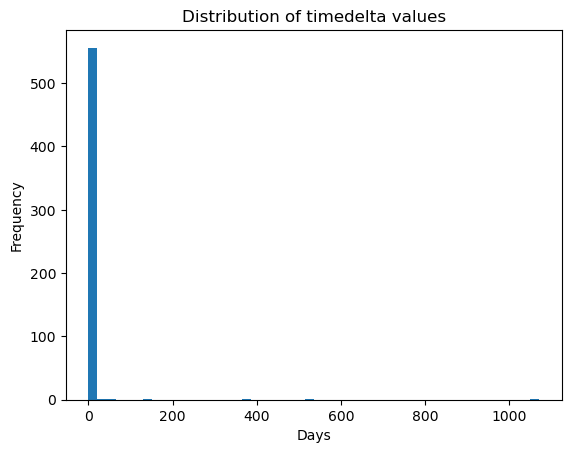

In [126]:
# There appears to be an error with some of the timedelta values, as the above results make little sense.
# Let's find out where the issue is by plotting a histogram

# Plot a histogram to visualize the distribution of timedelta values
cs_test5_station0_c['downtime_abs'].dt.days.plot(kind='hist', bins=50)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Distribution of timedelta values')
plt.show()

In [128]:
# We can see that there is an extreme outlier. Let's find it in our dataframe:

# Set a threshold 
st0_threshold = pd.Timedelta(days=1000)

# Filter rows with timedelta values exceeding the threshold
st0_outliers = cs_test5_station0_c[cs_test5_station0_c['downtime_abs'] > st0_threshold]

print(st0_outliers)

Rows with outliers:
     Unnamed: 0                        id            connectionTime  \
342      1235.0  5c36631ef9af8b4639a8e58b 2018-10-08 05:34:52+00:00   

               disconnectTime          doneChargingTime  kWhDelivered  \
342 2018-10-08 16:43:48+00:00 2018-10-08 16:00:03+00:00        22.845   

                                  sessionID  spaceID    stationID  \
342  1_1_179_810_2018-10-08 13:34:52.479296  AG-3F30  1-1-179-810   

                timezone  ...  public-site             UOT  \
342  America/Los_Angeles  ...        False 0 days 00:43:45   

    kWhDelivered-binned kWhDelivered-pct connectionTime-hour  \
342                 Low         0.209978                 5.0   

    doneChargingTime-hour  dayOfWeek  tempID             downtime  \
342                  16.0     Monday     0.0 -1072 days +15:24:33   

          downtime_abs  
342 1071 days 08:35:27  

[1 rows x 23 columns]


In [148]:
# Lets investigate row 342:

cs_test5_station0_c.iloc[342]

Unnamed: 0                                                          1964.0
id                                                5c366622f9af8b4639a8e864
connectionTime                                   2018-10-23 05:03:02+00:00
disconnectTime                                   2018-10-23 16:23:20+00:00
doneChargingTime                                 2018-10-23 05:22:56+00:00
kWhDelivered                                                         2.035
sessionID                           1_1_179_810_2018-10-23 13:03:02.222586
spaceID                                                            AG-3F30
stationID                                                      1-1-179-810
timezone                                               America/Los_Angeles
userID                                                               416.0
userInputs               [{'WhPerMile': 357, 'kWhRequested': 17.85, 'mi...
private-site                                                          True
public-site              

We can see that the entry in row 342 is from 2018. This gives us the insight that the entries in our dataframe are not sorted by time, as we have previously assumed. Therefore, we need to sort the entries by their connectionTime before making the downtime calculations.

In [149]:
station0_sorted = cs_test5_station0_c.sort_values(by='connectionTime')

station0_sorted


,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime,downtime_abs
342,1235.0,5c36631ef9af8b4639a8e58b,2018-10-08 05:34:52+00:00,2018-10-08 16:43:48+00:00,2018-10-08 16:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:43:45,Low,0.209978,5.0,16.0,Monday,0.0,-1072 days +15:24:33,1071 days 08:35:27
343,1315.0,5c366352f9af8b4639a8e5db,2018-10-09 06:08:45+00:00,2018-10-09 18:54:57+00:00,2018-10-09 08:25:17+00:00,14.015,1_1_179_810_2018-10-09 14:08:45.131958,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 10:29:40,Low,0.128818,6.0,8.0,Tuesday,0.0,0 days 13:24:57,0 days 13:24:57
344,1384.0,5c36639ff9af8b4639a8e620,2018-10-10 06:10:15+00:00,2018-10-10 14:14:18+00:00,2018-10-10 09:51:42+00:00,10.641,1_1_179_810_2018-10-10 14:10:15.101617,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 04:22:36,Low,0.097806,6.0,9.0,Wednesday,0.0,0 days 11:15:18,0 days 11:15:18
345,1425.0,5c36639ff9af8b4639a8e649,2018-10-10 14:18:50+00:00,2018-10-10 18:20:59+00:00,2018-10-10 18:16:50+00:00,11.093,1_1_179_810_2018-10-10 22:18:49.959281,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:04:09,Low,0.101960,14.0,18.0,Wednesday,0.0,0 days 00:04:32,0 days 00:04:32
346,1443.0,5c3663eaf9af8b4639a8e65b,2018-10-11 05:25:51+00:00,2018-10-11 14:10:32+00:00,2018-10-11 06:55:37+00:00,9.453,1_1_179_810_2018-10-11 13:25:50.591057,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 07:14:55,Low,0.086886,5.0,6.0,Thursday,0.0,0 days 11:04:52,0 days 11:04:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,5667.0,614d1c47f9af8b6a7d813e05,2021-09-07 07:31:34+00:00,2021-09-07 15:08:25+00:00,2021-09-07 08:52:16+00:00,5.936,1_1_179_810_2021-09-07 15:31:26.795919,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 06:16:09,Low,0.054560,7.0,8.0,Tuesday,0.0,3 days 15:55:26,3 days 15:55:26
338,5730.0,614e6dc3f9af8b6c6e8d5b18,2021-09-08 08:46:57+00:00,2021-09-08 18:13:10+00:00,2021-09-08 12:44:53+00:00,24.732,1_1_179_810_2021-09-08 16:46:42.676598,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 05:28:17,Low,0.227322,8.0,12.0,Wednesday,0.0,0 days 17:38:32,0 days 17:38:32
339,5780.0,614fbf42f9af8b6e5166424d,2021-09-09 08:39:19+00:00,2021-09-09 14:08:52+00:00,2021-09-09 10:36:09+00:00,5.368,1_1_179_810_2021-09-09 16:39:06.893105,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 03:32:43,Low,0.049339,8.0,10.0,Thursday,0.0,0 days 14:26:09,0 days 14:26:09
340,5801.0,615110a9f9af8b707a6c34c9,2021-09-10 04:43:12+00:00,2021-09-10 07:57:09+00:00,2021-09-10 05:33:41+00:00,5.444,1_1_179_810_2021-09-10 12:42:39.840070,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 02:23:28,Low,0.050038,4.0,5.0,Friday,0.0,0 days 14:34:20,0 days 14:34:20


Now, we can redo our calculations from before by running the same code for our new station0_sorted dataframe.

In [150]:
#First we modify the index:
    
station0_sorted.index = range(1,len(station0_sorted)+1)
station0_sorted

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime,downtime_abs
1,1235.0,5c36631ef9af8b4639a8e58b,2018-10-08 05:34:52+00:00,2018-10-08 16:43:48+00:00,2018-10-08 16:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:43:45,Low,0.209978,5.0,16.0,Monday,0.0,-1072 days +15:24:33,1071 days 08:35:27
2,1315.0,5c366352f9af8b4639a8e5db,2018-10-09 06:08:45+00:00,2018-10-09 18:54:57+00:00,2018-10-09 08:25:17+00:00,14.015,1_1_179_810_2018-10-09 14:08:45.131958,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 10:29:40,Low,0.128818,6.0,8.0,Tuesday,0.0,0 days 13:24:57,0 days 13:24:57
3,1384.0,5c36639ff9af8b4639a8e620,2018-10-10 06:10:15+00:00,2018-10-10 14:14:18+00:00,2018-10-10 09:51:42+00:00,10.641,1_1_179_810_2018-10-10 14:10:15.101617,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 04:22:36,Low,0.097806,6.0,9.0,Wednesday,0.0,0 days 11:15:18,0 days 11:15:18
4,1425.0,5c36639ff9af8b4639a8e649,2018-10-10 14:18:50+00:00,2018-10-10 18:20:59+00:00,2018-10-10 18:16:50+00:00,11.093,1_1_179_810_2018-10-10 22:18:49.959281,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:04:09,Low,0.101960,14.0,18.0,Wednesday,0.0,0 days 00:04:32,0 days 00:04:32
5,1443.0,5c3663eaf9af8b4639a8e65b,2018-10-11 05:25:51+00:00,2018-10-11 14:10:32+00:00,2018-10-11 06:55:37+00:00,9.453,1_1_179_810_2018-10-11 13:25:50.591057,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 07:14:55,Low,0.086886,5.0,6.0,Thursday,0.0,0 days 11:04:52,0 days 11:04:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,5667.0,614d1c47f9af8b6a7d813e05,2021-09-07 07:31:34+00:00,2021-09-07 15:08:25+00:00,2021-09-07 08:52:16+00:00,5.936,1_1_179_810_2021-09-07 15:31:26.795919,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 06:16:09,Low,0.054560,7.0,8.0,Tuesday,0.0,3 days 15:55:26,3 days 15:55:26
559,5730.0,614e6dc3f9af8b6c6e8d5b18,2021-09-08 08:46:57+00:00,2021-09-08 18:13:10+00:00,2021-09-08 12:44:53+00:00,24.732,1_1_179_810_2021-09-08 16:46:42.676598,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 05:28:17,Low,0.227322,8.0,12.0,Wednesday,0.0,0 days 17:38:32,0 days 17:38:32
560,5780.0,614fbf42f9af8b6e5166424d,2021-09-09 08:39:19+00:00,2021-09-09 14:08:52+00:00,2021-09-09 10:36:09+00:00,5.368,1_1_179_810_2021-09-09 16:39:06.893105,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 03:32:43,Low,0.049339,8.0,10.0,Thursday,0.0,0 days 14:26:09,0 days 14:26:09
561,5801.0,615110a9f9af8b707a6c34c9,2021-09-10 04:43:12+00:00,2021-09-10 07:57:09+00:00,2021-09-10 05:33:41+00:00,5.444,1_1_179_810_2021-09-10 12:42:39.840070,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 02:23:28,Low,0.050038,4.0,5.0,Friday,0.0,0 days 14:34:20,0 days 14:34:20


In [151]:
# Now we recalculate the downtime column:

downtime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
station0_sorted['downtime'] = downtime - downtime # set initial downtime to 0

for i in range(1,len(station0_sorted)):
    station0_sorted.loc[i+1,'downtime'] = station0_sorted.loc[i+1,'connectionTime'] - station0_sorted.loc[i,'disconnectTime']  

station0_sorted.head(5)


,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime,downtime_abs
1,1235.0,5c36631ef9af8b4639a8e58b,2018-10-08 05:34:52+00:00,2018-10-08 16:43:48+00:00,2018-10-08 16:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:43:45,Low,0.209978,5.0,16.0,Monday,0.0,0 days 00:00:00,1071 days 08:35:27
2,1315.0,5c366352f9af8b4639a8e5db,2018-10-09 06:08:45+00:00,2018-10-09 18:54:57+00:00,2018-10-09 08:25:17+00:00,14.015,1_1_179_810_2018-10-09 14:08:45.131958,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 10:29:40,Low,0.128818,6.0,8.0,Tuesday,0.0,0 days 13:24:57,0 days 13:24:57
3,1384.0,5c36639ff9af8b4639a8e620,2018-10-10 06:10:15+00:00,2018-10-10 14:14:18+00:00,2018-10-10 09:51:42+00:00,10.641,1_1_179_810_2018-10-10 14:10:15.101617,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 04:22:36,Low,0.097806,6.0,9.0,Wednesday,0.0,0 days 11:15:18,0 days 11:15:18
4,1425.0,5c36639ff9af8b4639a8e649,2018-10-10 14:18:50+00:00,2018-10-10 18:20:59+00:00,2018-10-10 18:16:50+00:00,11.093,1_1_179_810_2018-10-10 22:18:49.959281,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 00:04:09,Low,0.101960,14.0,18.0,Wednesday,0.0,0 days 00:04:32,0 days 00:04:32
5,1443.0,5c3663eaf9af8b4639a8e65b,2018-10-11 05:25:51+00:00,2018-10-11 14:10:32+00:00,2018-10-11 06:55:37+00:00,9.453,1_1_179_810_2018-10-11 13:25:50.591057,AG-3F30,1-1-179-810,America/Los_Angeles,...,False,0 days 07:14:55,Low,0.086886,5.0,6.0,Thursday,0.0,0 days 11:04:52,0 days 11:04:52


In [152]:
# As our entries are now sorted correctly, our downtime values are all positive, 
# rendering the temporarily created downtime_abs column useless. Therefore, we can drop it.

station0_sorted.drop('downtime_abs', axis=1, inplace=True)

station0_sorted.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime
1,1235.0,5c36631ef9af8b4639a8e58b,2018-10-08 05:34:52+00:00,2018-10-08 16:43:48+00:00,2018-10-08 16:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 00:43:45,Low,0.209978,5.0,16.0,Monday,0.0,0 days 00:00:00
2,1315.0,5c366352f9af8b4639a8e5db,2018-10-09 06:08:45+00:00,2018-10-09 18:54:57+00:00,2018-10-09 08:25:17+00:00,14.015,1_1_179_810_2018-10-09 14:08:45.131958,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 10:29:40,Low,0.128818,6.0,8.0,Tuesday,0.0,0 days 13:24:57
3,1384.0,5c36639ff9af8b4639a8e620,2018-10-10 06:10:15+00:00,2018-10-10 14:14:18+00:00,2018-10-10 09:51:42+00:00,10.641,1_1_179_810_2018-10-10 14:10:15.101617,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 04:22:36,Low,0.097806,6.0,9.0,Wednesday,0.0,0 days 11:15:18
4,1425.0,5c36639ff9af8b4639a8e649,2018-10-10 14:18:50+00:00,2018-10-10 18:20:59+00:00,2018-10-10 18:16:50+00:00,11.093,1_1_179_810_2018-10-10 22:18:49.959281,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 00:04:09,Low,0.101960,14.0,18.0,Wednesday,0.0,0 days 00:04:32
5,1443.0,5c3663eaf9af8b4639a8e65b,2018-10-11 05:25:51+00:00,2018-10-11 14:10:32+00:00,2018-10-11 06:55:37+00:00,9.453,1_1_179_810_2018-10-11 13:25:50.591057,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 07:14:55,Low,0.086886,5.0,6.0,Thursday,0.0,0 days 11:04:52


In [153]:
# Let's again calculate the average downtime for station 0

avg_downtime0 = station0_sorted['downtime'].mean()
avg_downtime0

Timedelta('1 days 14:32:44.637010')

In [154]:
# We can also look at the maximum downtime for station 0

station0_max = station0_sorted['downtime'].max()
station0_max

Timedelta('139 days 02:14:27')

We can see that there is still a significant outlier in the sorted dataframe. This is likely due to a period in which the entire parking lot was not in use. Let's visualize the distribution of the downtime again.

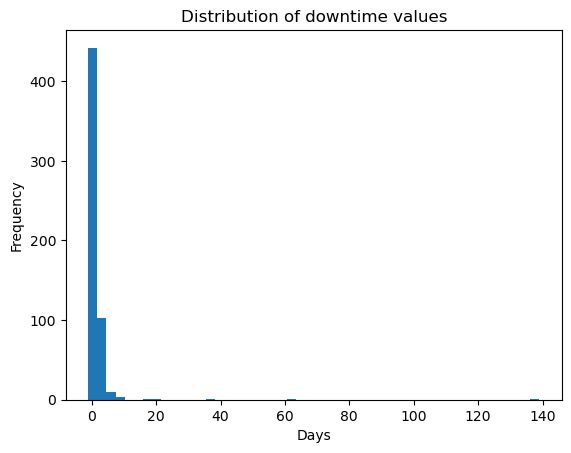

In [168]:
# Plot a histogram to visualize the distribution of timedelta values
station0_sorted['downtime'].dt.days.plot(kind='hist', bins=50)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Distribution of downtime values')
plt.show()

In [173]:
# For the sake of ease, let's drop all rows where the downtime is higher than 10 days.
# As previously stated, these are likely the result of extended periods in which
# the parking lot was unusable or the site simply experienced signficantly less traffic than usual.

station0_clean = station0_sorted.loc[station0_sorted['downtime'] <= pd.Timedelta(days=10)]

station0_clean

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,tempID,downtime
1,1235.0,5c36631ef9af8b4639a8e58b,2018-10-08 05:34:52+00:00,2018-10-08 16:43:48+00:00,2018-10-08 16:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 00:43:45,Low,0.209978,5.0,16.0,Monday,0.0,0 days 00:00:00
2,1315.0,5c366352f9af8b4639a8e5db,2018-10-09 06:08:45+00:00,2018-10-09 18:54:57+00:00,2018-10-09 08:25:17+00:00,14.015,1_1_179_810_2018-10-09 14:08:45.131958,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 10:29:40,Low,0.128818,6.0,8.0,Tuesday,0.0,0 days 13:24:57
3,1384.0,5c36639ff9af8b4639a8e620,2018-10-10 06:10:15+00:00,2018-10-10 14:14:18+00:00,2018-10-10 09:51:42+00:00,10.641,1_1_179_810_2018-10-10 14:10:15.101617,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 04:22:36,Low,0.097806,6.0,9.0,Wednesday,0.0,0 days 11:15:18
4,1425.0,5c36639ff9af8b4639a8e649,2018-10-10 14:18:50+00:00,2018-10-10 18:20:59+00:00,2018-10-10 18:16:50+00:00,11.093,1_1_179_810_2018-10-10 22:18:49.959281,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 00:04:09,Low,0.101960,14.0,18.0,Wednesday,0.0,0 days 00:04:32
5,1443.0,5c3663eaf9af8b4639a8e65b,2018-10-11 05:25:51+00:00,2018-10-11 14:10:32+00:00,2018-10-11 06:55:37+00:00,9.453,1_1_179_810_2018-10-11 13:25:50.591057,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 07:14:55,Low,0.086886,5.0,6.0,Thursday,0.0,0 days 11:04:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,5667.0,614d1c47f9af8b6a7d813e05,2021-09-07 07:31:34+00:00,2021-09-07 15:08:25+00:00,2021-09-07 08:52:16+00:00,5.936,1_1_179_810_2021-09-07 15:31:26.795919,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 06:16:09,Low,0.054560,7.0,8.0,Tuesday,0.0,3 days 15:55:26
559,5730.0,614e6dc3f9af8b6c6e8d5b18,2021-09-08 08:46:57+00:00,2021-09-08 18:13:10+00:00,2021-09-08 12:44:53+00:00,24.732,1_1_179_810_2021-09-08 16:46:42.676598,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 05:28:17,Low,0.227322,8.0,12.0,Wednesday,0.0,0 days 17:38:32
560,5780.0,614fbf42f9af8b6e5166424d,2021-09-09 08:39:19+00:00,2021-09-09 14:08:52+00:00,2021-09-09 10:36:09+00:00,5.368,1_1_179_810_2021-09-09 16:39:06.893105,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 03:32:43,Low,0.049339,8.0,10.0,Thursday,0.0,0 days 14:26:09
561,5801.0,615110a9f9af8b707a6c34c9,2021-09-10 04:43:12+00:00,2021-09-10 07:57:09+00:00,2021-09-10 05:33:41+00:00,5.444,1_1_179_810_2021-09-10 12:42:39.840070,AG-3F30,1-1-179-810,America/Los_Angeles,...,True,False,0 days 02:23:28,Low,0.050038,4.0,5.0,Friday,0.0,0 days 14:34:20


In [174]:
# Finally, let's calculate the average downtime for station 0 a last time

avg_downtime0 = station0_clean['downtime'].mean()
avg_downtime0

Timedelta('1 days 02:27:52.861510')

In [175]:
# And also the maximum downtime for station 0

station0_max = station0_clean['downtime'].max()
station0_max

Timedelta('8 days 21:37:34')

Let's also visualize the final distribution of the downtime values. For better readability, let's also
convert the downtime to hours.

C:\Users\nikla\AppData\Local\Temp\ipykernel_22284\2832507301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station0_clean['downtime_in_hours'] = station0_clean['downtime'].dt.total_seconds() / 3600


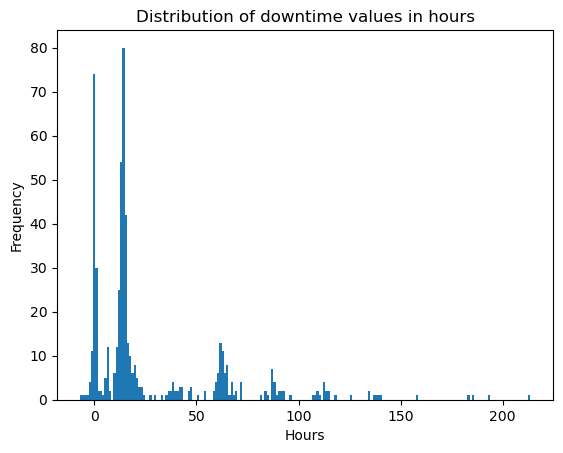

In [181]:
# Convert timedelta values to hours
station0_clean['downtime_in_hours'] = station0_clean['downtime'].dt.total_seconds() / 3600

station0_clean['downtime_in_hours'].plot(kind='hist', bins=200)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of downtime values in hours')
plt.show()

**How can we draw conclusions from this KPI?**

To get proper value from this KPI, one would have to apply this process to all 106 charging stations of the parking site.
By doing that, one can evaluate the performances of different EVSE and calculate the downtime of the average EVSE. Potentially, there might be a few EVSE that have a significantly higher average downtime than the average EVSE, indicating that the total number of charging stations is higher than necessary. If we assume that every station comes with maintenance and upkeep costs, it might be a good idea to reduce the number of EVSE, if the costs of uninstalling them does not outweigh the potential savings. 

**KPI 3: Average Charging Time**

As a final KPI, we can calculate the average charging time (ACT). To do so, we calculate the time difference between connectionTime and doneChargingTime.

In [191]:
cs_test6 = cs_test3

cs_test6["CT"] = cs_test6["doneChargingTime"] - cs_test6["connectionTime"]

cs_test6.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,...,userInputs,private-site,public-site,UOT,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,CT
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,...,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,0 days 01:39:40,Low,0.229932,13,9,Thursday,0 days 04:22:41
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,...,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,0 days 02:20:16,Low,0.304208,5,12,Thursday,0 days 06:41:15
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,...,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 08:04:16,Low,0.059937,5,8,Thursday,0 days 02:38:31
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,...,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,0 days 01:19:54,Low,0.021646,5,7,Thursday,0 days 01:18:47
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,...,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,0 days 03:51:10,Low,0.122935,6,10,Thursday,0 days 04:17:29


In [192]:
# We can now calculate the average charging time of all stations...

averageCT = cs_test6['CT'].mean()

averageCT

Timedelta('0 days 03:32:28.611109329')

In [196]:
# ...and we can calculate the average charging time for each single station, giving us further insights.

averageCT_per_station = cs_test6.groupby("stationID")["CT"].mean()
averageCT_per_station

stationID
1-1-178-817   0 days 04:29:13.511677282
1-1-178-823   0 days 03:04:58.855010660
1-1-178-824   0 days 04:11:15.712871287
1-1-178-828   0 days 03:25:33.920545746
1-1-179-777   0 days 04:02:30.396747967
                         ...           
2-39-91-441   0 days 02:51:54.286036036
2-39-92-436   0 days 02:35:24.976190476
2-39-92-442   0 days 03:19:42.890243902
2-39-95-27    0 days 02:59:20.668515950
2-39-95-444   0 days 03:21:20.594871794
Name: CT, Length: 106, dtype: timedelta64[ns]

**How can we draw conclusions from this KPI?**

We want to single out the stations that are significantly underperforming in comparison to the average charging time of all stations. To do this, we select all stations with an ACT above 4:30h - this threshold can be set freely by the operators of the parking site, though.

In [201]:
# Set our threshold of 4:30h 
ACT_threshold = pd.Timedelta(hours=4, minutes=30)

ACT_underperformers = averageCT_per_station[averageCT_per_station > ACT_threshold]

print(ACT_underperformers)

stationID
1-1-179-779   0 days 04:46:42.961797752
1-1-179-790   0 days 04:41:27.611909650
1-1-179-799   0 days 04:55:00.750759878
1-1-179-801   0 days 04:42:28.929787234
1-1-191-778   0 days 04:35:40.812356979
1-1-191-780   0 days 04:42:34.436450839
1-1-191-793   0 days 04:30:38.575963718
1-1-191-795   0 days 04:40:53.416666666
1-1-191-802   0 days 04:35:09.930069930
1-1-191-803   0 days 04:56:17.508474576
1-1-191-804   0 days 04:54:53.217703349
1-1-191-811   0 days 04:50:09.369928400
1-1-191-812   0 days 04:47:46.707894736
2-39-78-362   0 days 06:18:45.704035874
Name: CT, dtype: timedelta64[ns]


This way, the operators can identify which stations are underperforming and then look into potential problems with these stations - for example, they might need repairing or should be replaced entirely.